In [1]:
## Import libraries/packages
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False

# Import Data <a id='import_data'/>
---

In [2]:
df = pd.read_csv('churn_clean.csv').drop('CaseOrder', axis=1)

In [3]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income              

---
> No null values exist in the data set based on the info function.
---

In [5]:
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# Prepare Data <a id='prepare_data'/>
---

In [6]:
## Rename survey columns
df.rename({
    'Item1':'TimelyResponse',
    'Item2':'TimelyFixes',
    'Item3':'TimelyReplacements',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'RespectfulResponse',
    'Item7':'CourteousExchange',
    'Item8':'ActiveListening'
}, axis=1, inplace=True)

## Check Cardinality

In [7]:
## Create a copy of original DataFrame
df1 = df.copy()

In [8]:
## Count unique values
n = 0
for col in df.columns:
    cardinality = len(df[col].unique())
    
    ## Drop categorical (nominal) variables with more than 5 unique values
    if cardinality > 5:
        df1.drop(col, axis=1, inplace=True)
        print('{}: {}, Dropped'.format(col, cardinality))
        n+=1
    else:
        print(col + ':', cardinality)
print(n, 'variables dropped')

Customer_id: 10000, Dropped
Interaction: 10000, Dropped
UID: 10000, Dropped
City: 6058, Dropped
State: 52, Dropped
County: 1620, Dropped
Zip: 8583, Dropped
Lat: 8563, Dropped
Lng: 8630, Dropped
Population: 5933, Dropped
Area: 3
TimeZone: 25, Dropped
Job: 639, Dropped
Children: 11, Dropped
Age: 72, Dropped
Income: 9993, Dropped
Marital: 5
Gender: 3
Churn: 2
Outage_sec_perweek: 9986, Dropped
Email: 23, Dropped
Contacts: 8, Dropped
Yearly_equip_failure: 6, Dropped
Techie: 2
Contract: 3
Port_modem: 2
Tablet: 2
InternetService: 3
Phone: 2
Multiple: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
PaymentMethod: 4
Tenure: 9996, Dropped
MonthlyCharge: 750, Dropped
Bandwidth_GB_Year: 10000, Dropped
TimelyResponse: 7, Dropped
TimelyFixes: 7, Dropped
TimelyReplacements: 8, Dropped
Reliability: 7, Dropped
Options: 7, Dropped
RespectfulResponse: 8, Dropped
CourteousExchange: 7, Dropped
ActiveListening: 8, Dropped
30 variab

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              10000 non-null  object
 1   Marital           10000 non-null  object
 2   Gender            10000 non-null  object
 3   Churn             10000 non-null  object
 4   Techie            10000 non-null  object
 5   Contract          10000 non-null  object
 6   Port_modem        10000 non-null  object
 7   Tablet            10000 non-null  object
 8   InternetService   10000 non-null  object
 9   Phone             10000 non-null  object
 10  Multiple          10000 non-null  object
 11  OnlineSecurity    10000 non-null  object
 12  OnlineBackup      10000 non-null  object
 13  DeviceProtection  10000 non-null  object
 14  TechSupport       10000 non-null  object
 15  StreamingTV       10000 non-null  object
 16  StreamingMovies   10000 non-null  object
 17  PaperlessBill

---
> Dropped 30 variables with 19 variables remaining in our cleaned data set.
---

# Explore Data <a id='explore_data'/>
---

## Run Chi-Square Test of Independence

---
> H0: There is no relationship between churn and the independent variable.<br>H1: There is a relationship between churn and the independent variable.<br>alpha: 0.05
---

In [10]:
chi_2 = pd.DataFrame(index=df1.drop('Churn', axis=1).columns, columns=['critical', 'statistic', 'pvalue', 'results'])

In [11]:
chi_2.head()

,critical,statistic,pvalue,results
Area,NaN,NaN,NaN,NaN
Marital,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN
Techie,NaN,NaN,NaN,NaN
Contract,NaN,NaN,NaN,NaN


In [12]:
## Loop through each variable
for col in df1.columns:
    if col != 'Churn':
        ## Create  and view contingency table
        contingency = pd.crosstab(df1['Churn'], df1[col])
        display(contingency)
        ## Run chi2 test of independence
        statistic, pvalue, dof, frequencies = chi2_contingency(contingency)
        ## Calculate critical value
        critical = chi2.ppf(1-.05, df=dof)
        ## Store results in DataFrame
        chi_2['critical'][col] = critical
        chi_2['statistic'][col] = statistic
        chi_2['pvalue'][col] = pvalue
        if  critical < statistic:
            chi_2['results'][col] = 'reject'
        else:
            chi_2['results'][col] = 'accept'

Area,Rural,Suburban,Urban
Churn,,,
No,2464,2473,2413
Yes,863,873,914


Marital,Divorced,Married,Never Married,Separated,Widowed
Churn,,,,,
No,1539,1418,1468,1454,1471
Yes,553,493,488,560,556


Gender,Female,Male,Nonbinary
Churn,,,
No,3753,3425,172
Yes,1272,1319,59


Techie,No,Yes
Churn,,
No,6226,1124
Yes,2095,555


Contract,Month-to-month,One year,Two Year
Churn,,,
No,3422,1795,2133
Yes,2034,307,309


Port_modem,No,Yes
Churn,,
No,3815,3535
Yes,1351,1299


Tablet,No,Yes
Churn,,
No,5146,2204
Yes,1863,787


InternetService,DSL,Fiber Optic,None
Churn,,,
No,2349,3368,1633
Yes,1114,1040,496


Phone,No,Yes
Churn,,
No,652,6698
Yes,281,2369


Multiple,No,Yes
Churn,,
No,4253,3097
Yes,1139,1511


OnlineSecurity,No,Yes
Churn,,
No,4693,2657
Yes,1731,919


OnlineBackup,No,Yes
Churn,,
No,4149,3201
Yes,1345,1305


DeviceProtection,No,Yes
Churn,,
No,4250,3100
Yes,1364,1286


TechSupport,No,Yes
Churn,,
No,4634,2716
Yes,1616,1034


StreamingTV,No,Yes
Churn,,
No,4235,3115
Yes,836,1814


StreamingMovies,No,Yes
Churn,,
No,4394,2956
Yes,716,1934


PaperlessBilling,No,Yes
Churn,,
No,3042,4308
Yes,1076,1574


PaymentMethod,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
Churn,,,,
No,1671,1543,2435,1701
Yes,558,540,963,589


In [13]:
## View test results
chi_2

,critical,statistic,pvalue,results
Area,5.991465,2.439074,0.295367,accept
Marital,9.487729,5.565781,0.234008,accept
Gender,5.991465,7.880065,0.019448,reject
Techie,3.841459,44.114794,0.0,reject
Contract,5.991465,718.591581,0.0,reject
Port_modem,3.841459,0.628905,0.427757,accept
Tablet,3.841459,0.064075,0.800168,accept
InternetService,5.991465,87.462046,0.0,reject
Phone,3.841459,6.711745,0.009578,reject
Multiple,3.841459,173.037988,0.0,reject


## Univariate Analysis

---
> Continuous Variables: Bandwidth_GB_Year, Outage_sec_perweek<br>Categorical Variables: Contract, PaymentMethod
---

### Continuous

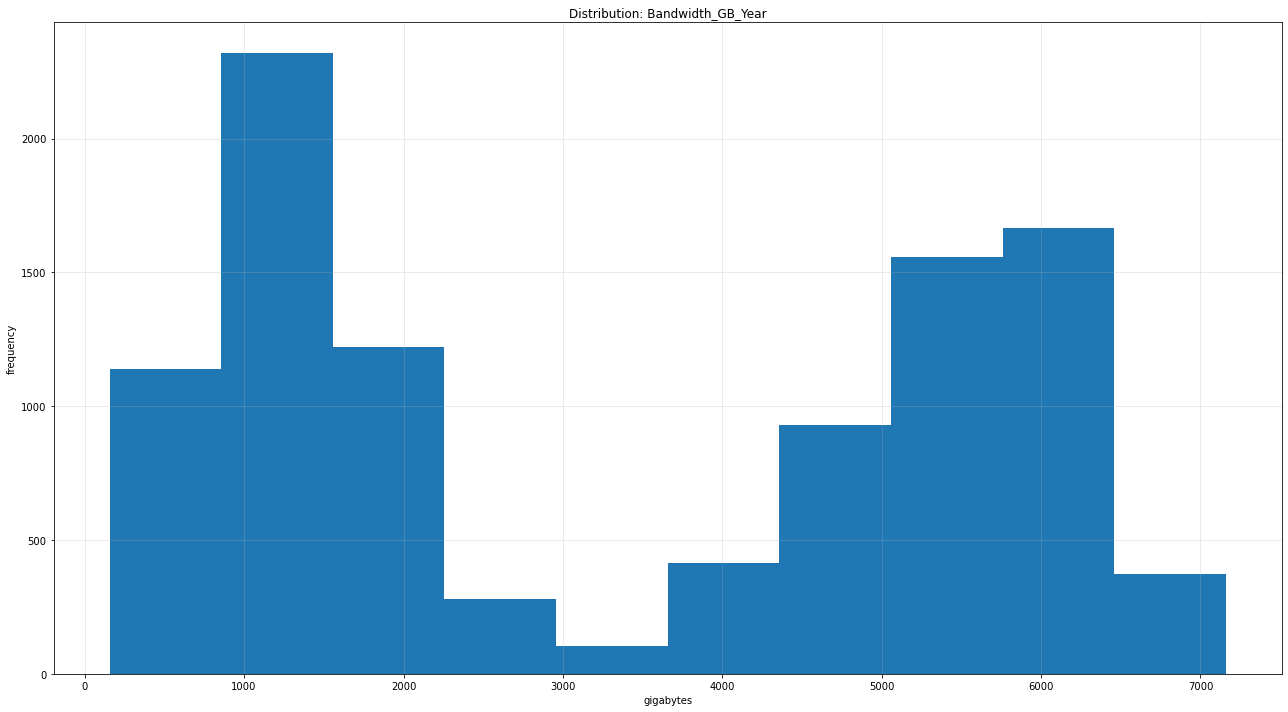

In [14]:
plt.hist(df.Bandwidth_GB_Year)
plt.title('Distribution: Bandwidth_GB_Year')
plt.xlabel('gigabytes')
plt.ylabel('frequency')
plt.grid(alpha=0.3)
plt.tight_layout()

In [15]:
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

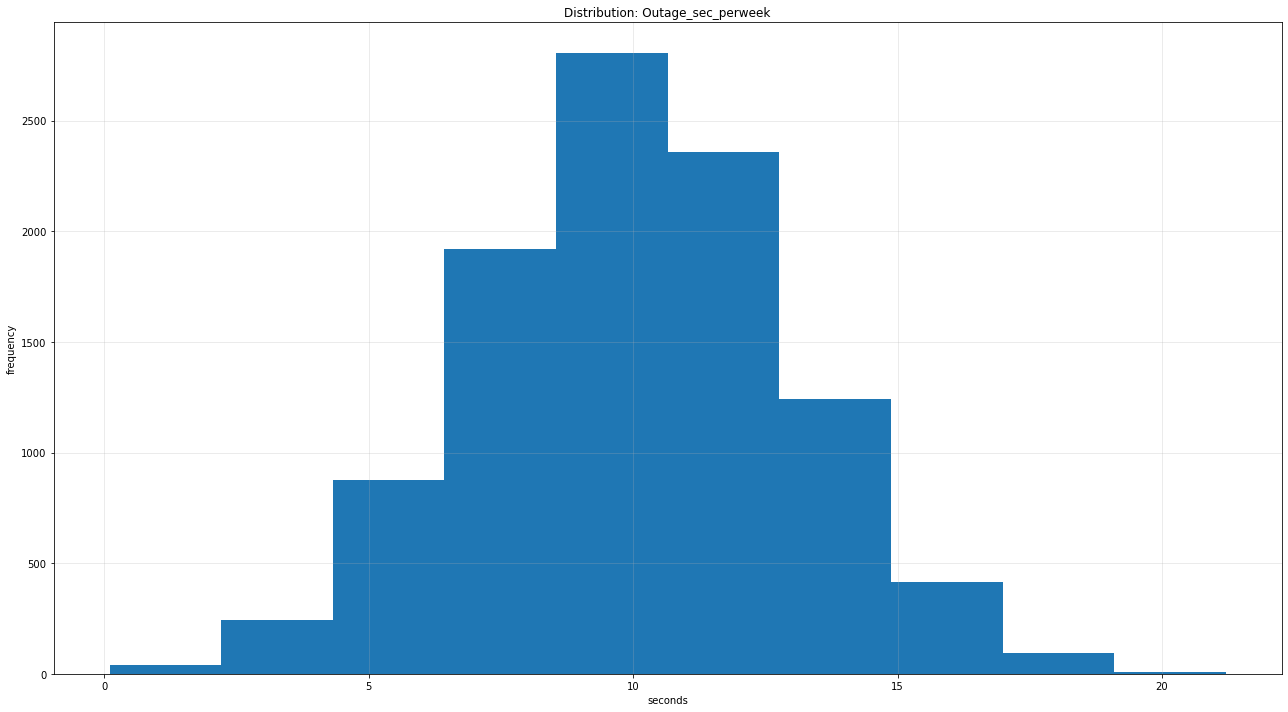

In [16]:
plt.hist(df.Outage_sec_perweek)
plt.title('Distribution: Outage_sec_perweek')
plt.xlabel('seconds')
plt.ylabel('frequency')
plt.grid(alpha=0.3)
plt.tight_layout()

In [17]:
df.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

### Categorical

In [18]:
def percent_of(var):
    print('Distribution of', var)
    value_counts = df[var].value_counts()
    i = 0
    for i in range(len(value_counts)):
        print('{}: {}%, {} occurences'.format(
            value_counts.index[i], 
            round((value_counts[i]/sum(value_counts))*100, 2), 
            value_counts[i]
        ))

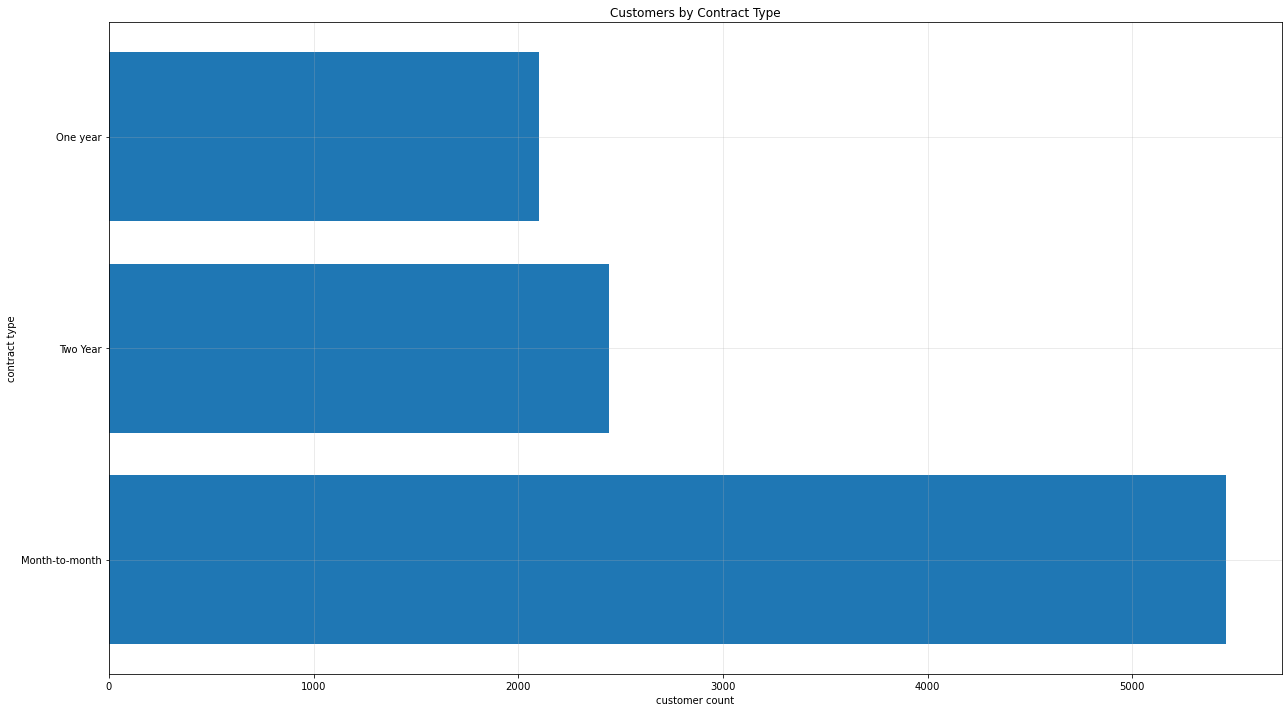

In [19]:
plt.barh(df.Contract.value_counts().index, df.Contract.value_counts())
plt.title('Customers by Contract Type')
plt.xlabel('customer count')
plt.ylabel('contract type')
plt.grid(alpha=0.3)
plt.tight_layout()

In [20]:
percent_of('Contract')

Distribution of Contract
Month-to-month: 54.56%, 5456 occurences
Two Year: 24.42%, 2442 occurences
One year: 21.02%, 2102 occurences


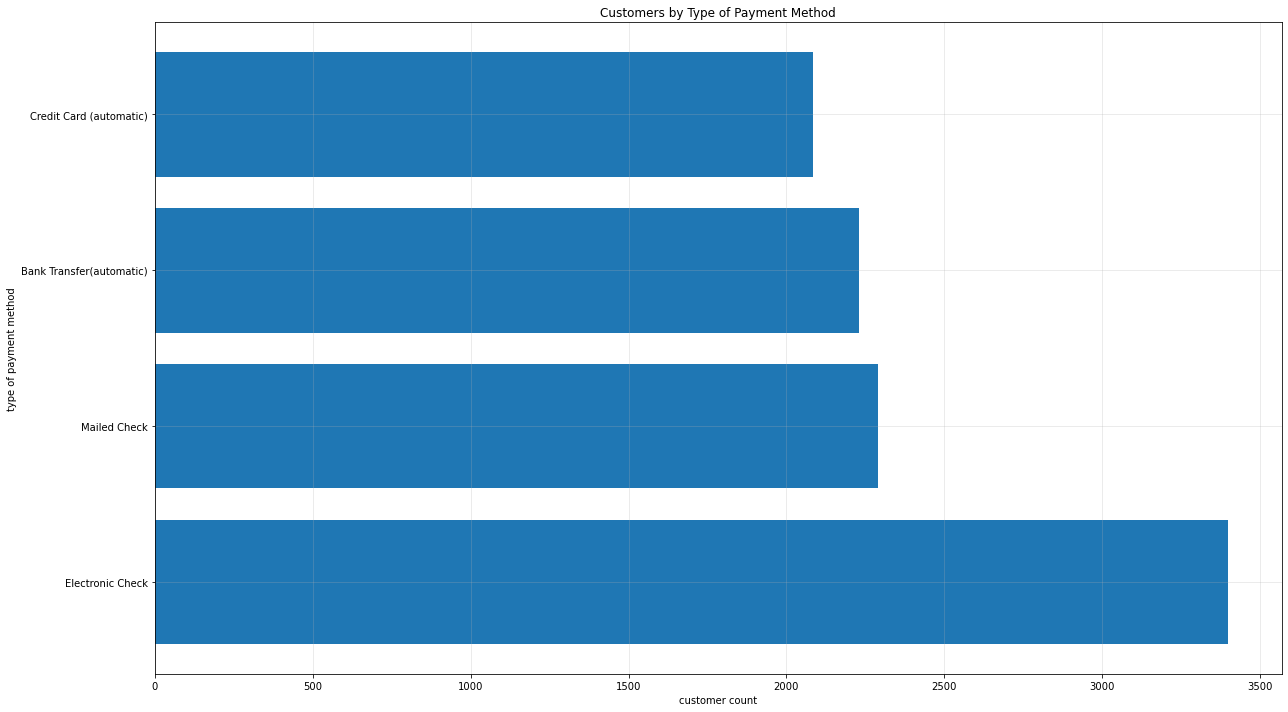

In [21]:
plt.barh(df.PaymentMethod.value_counts().index, df.PaymentMethod.value_counts())
plt.title('Customers by Type of Payment Method')
plt.xlabel('customer count')
plt.ylabel('type of payment method')
plt.grid(alpha=0.3)
plt.tight_layout()

In [22]:
percent_of('PaymentMethod')

Distribution of PaymentMethod
Electronic Check: 33.98%, 3398 occurences
Mailed Check: 22.9%, 2290 occurences
Bank Transfer(automatic): 22.29%, 2229 occurences
Credit Card (automatic): 20.83%, 2083 occurences


## Bivariate Analysis

---
> Continuous Variables: Bandwidth_GB_Year, Outage_sec_perweek<br>Categorical Variables: Churn, Multiple
---

### Continuous

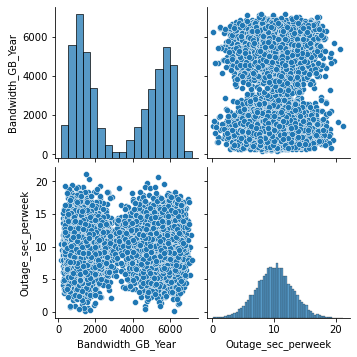

In [23]:
sns.pairplot(df[['Bandwidth_GB_Year', 'Outage_sec_perweek']])
plt.show()

In [24]:
df[['Bandwidth_GB_Year', 'Outage_sec_perweek']].corr()

,Bandwidth_GB_Year,Outage_sec_perweek
Bandwidth_GB_Year,1.000000,0.004176
Outage_sec_perweek,0.004176,1.000000


### Categorical

In [25]:
contingency = pd.crosstab(df.Churn, df.Multiple)

In [26]:
contingency

Multiple,No,Yes
Churn,,
No,4253,3097
Yes,1139,1511


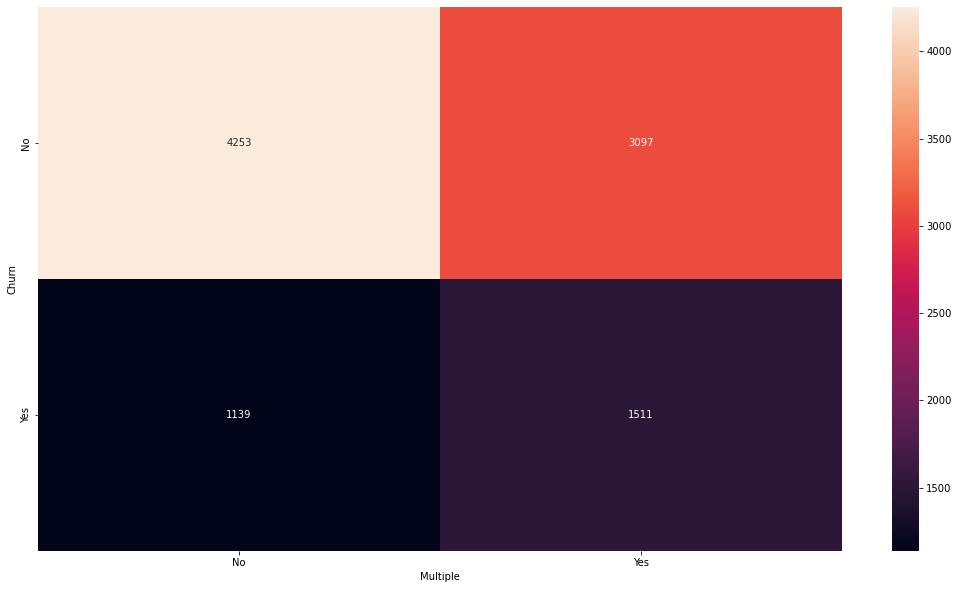

In [27]:
sns.heatmap(contingency, annot=contingency.values, fmt='')
plt.show()

In [28]:
statistic, pvalue, dof, frequencies = chi2_contingency(contingency)

In [29]:
critical = chi2.ppf(1-.05, dof)

In [30]:
statistic

173.03798837784385

In [31]:
pvalue

1.6057318542329707e-39

In [32]:
critical

3.841458820694124

In [33]:
if statistic < critical:
    print('accept the null hypothesis, no relationship exists')
else:
    print('reject the null hypothesis, relationship exists')

reject the null hypothesis, relationship exists
